## Objectives

This notebook visualizes trajectory drawn by EuRoC MAV drone sequence MH_01.

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("/app/src")
from src.utils.geometric_transformer import GeometryTransformer, EuRoC_GeometricTransformer

In [ ]:
leica = pd.read_csv("/app/data/EuRoC/MH_01_easy/leica0/data.csv")
gt_pose = pd.read_csv("/app/data/EuRoC/MH_01_easy/state_groundtruth_estimate0/data.csv")

In [3]:
leica_position = leica.columns[1:]
gt_position = gt_pose.columns[1:4]

In [4]:
gt_xyz = gt_pose[gt_position].values
leica_xyz = leica[leica_position].values

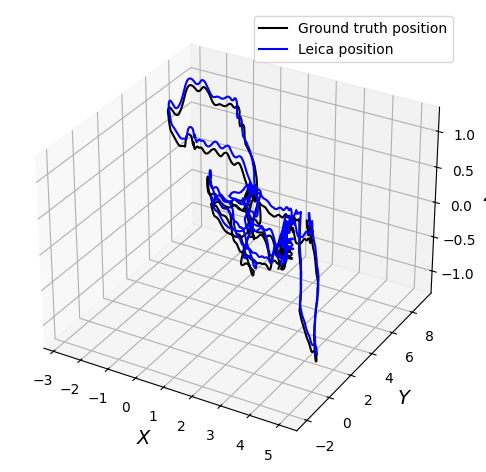

In [5]:
fig = plt.figure()

ax1 = fig.add_subplot(111, projection='3d')
x, y, z = gt_xyz.T
ax1.plot(x, y, z, label='Ground truth position', color='black')
x, y, z = leica_xyz.T
ax1.plot(x, y, z, label='Leica position', color='blue')
ax1.legend()
ax1.set_xlabel('$X$', fontsize=14)
ax1.set_ylabel('$Y$', fontsize=14)
ax1.set_zlabel('$Z$', fontsize=14)

fig.tight_layout()
plt.show()

In [6]:
plt.close()

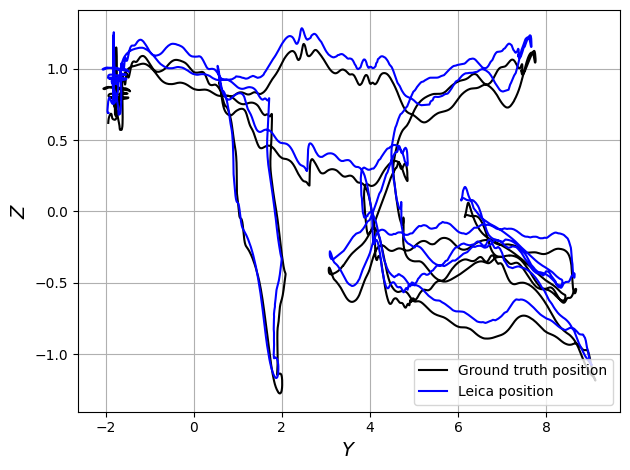

In [10]:
x, y, z = gt_xyz.T
plt.plot(y, z, label='Ground truth position', color='black')
x, y, z = leica_xyz.T
plt.plot(y, z, label='Leica position', color='blue')
plt.legend()
plt.xlabel('$Y$', fontsize=14)
plt.ylabel('$Z$', fontsize=14)

plt.tight_layout()
plt.grid()
plt.show()

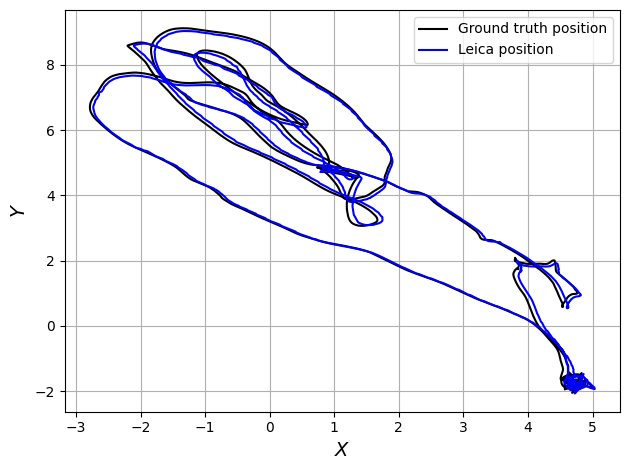

In [11]:
x, y, z = gt_xyz.T
plt.plot(x, y, label='Ground truth position', color='black')
x, y, z = leica_xyz.T
plt.plot(x, y, label='Leica position', color='blue')
plt.legend()
plt.xlabel('$X$', fontsize=14)
plt.ylabel('$Y$', fontsize=14)

plt.tight_layout()
plt.grid()
plt.show()

In [48]:
plt.close()

In [ ]:
vo_pose = pd.read_csv("/app/outputs/vo_estimates/pose_estimates_hybrid_euroc/absolute_pose/MH_01_easy/data.csv", header=None).values.reshape(-1, 3, 4)

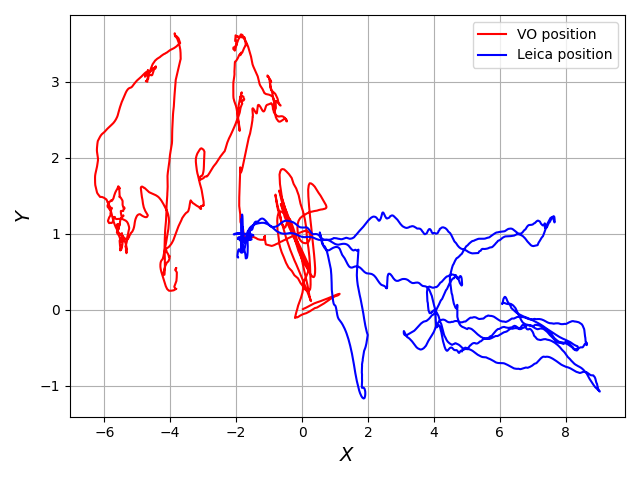

In [50]:
vo_position = vo_pose[:, :3, 3]
x, y, z = vo_position.T
plt.plot(y, z, label='VO position', color='red')
x, y, z = leica_xyz.T
plt.plot(y, z, label='Leica position', color='blue')
plt.legend()
plt.xlabel('$X$', fontsize=14)
plt.ylabel('$Y$', fontsize=14)

plt.tight_layout()
plt.grid()
plt.show()

In [51]:
plt.close()

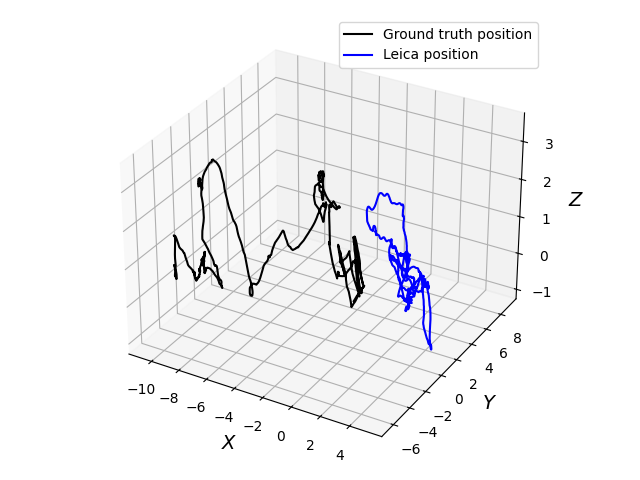

In [52]:
%matplotlib widget

fig = plt.figure()

ax1 = fig.add_subplot(111, projection='3d')
x, y, z = vo_position.T
ax1.plot(x, y, z, label='Ground truth position', color='black')
x, y, z = leica_xyz.T
ax1.plot(x, y, z, label='Leica position', color='blue')
ax1.legend()
ax1.set_xlabel('$X$', fontsize=14)
ax1.set_ylabel('$Y$', fontsize=14)
ax1.set_zlabel('$Z$', fontsize=14)

fig.tight_layout()
plt.show()


In [53]:
plt.close()

In [20]:
from scipy.spatial.transform import Rotation as R

In [14]:
def Rx(theta):
    """rotation matrix around x-axis
    """
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([
        [1, 0, 0],
        [0, c, s],
        [0, -s, c]
    ])

def Ry(theta):
    """rotation matrix around y-axis
    """
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([
        [c, 0, -s],
        [0, 1, 0],
        [s, 0, c]
    ])

def Rz(theta):
    """rotation matrix around z-axis
    """
    c = np.cos(theta)
    s = np.sin(theta)
    return np.array([
        [c, s, 0],
        [-s, c, 0],
        [0, 0, 1]
    ])

In [25]:
# R_imu_to_drone = np.array([
#     [0,  0, 1],  # drone x-axis (forward)
#     [0, -1, 0],  # drone y-axis (left)
#     [1,  0, 0]   # drone z-axis (up)
# ])
R_imu_to_drone = Ry(np.radians(90)) @ Rx(np.radians(180))
imu_acc = np.array([9.81, 0., 0.])
drone_acc = R_imu_to_drone @ imu_acc
print("Drone acc:", drone_acc)

Drone acc: [6.00689255e-16 0.00000000e+00 9.81000000e+00]


In [17]:
Ry(np.radians(90)) @ Rx(np.radians(180))

array([[ 6.12323400e-17,  1.22464680e-16,  1.00000000e+00],
       [ 0.00000000e+00, -1.00000000e+00,  1.22464680e-16],
       [ 1.00000000e+00, -7.49879891e-33, -6.12323400e-17]])

In [19]:
Rx(np.radians(-90)) @ Rz(np.radians(90))

array([[ 6.12323400e-17,  1.00000000e+00,  0.00000000e+00],
       [-6.12323400e-17,  3.74939946e-33, -1.00000000e+00],
       [-1.00000000e+00,  6.12323400e-17,  6.12323400e-17]])

In [22]:
R.from_euler('xyz', [180, 90, 0], degrees=True).as_matrix()

array([[ 2.22044605e-16,  1.22464680e-16, -1.00000000e+00],
       [ 0.00000000e+00, -1.00000000e+00, -1.22464680e-16],
       [-1.00000000e+00,  2.46519033e-32, -2.22044605e-16]])

In [24]:
R.from_euler('xyz', [90, 0, -90], degrees=True).as_matrix().T

array([[ 2.22044605e-16, -1.00000000e+00,  0.00000000e+00],
       [ 2.22044605e-16,  0.00000000e+00,  1.00000000e+00],
       [-1.00000000e+00, -2.22044605e-16,  2.22044605e-16]])